In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidents-analysis-1b092')
jovian.set_colab_id('1puB3bpaPTpgZyC2VD8iDHCe0eZcdkmsy')

     |████████████████████████████████| 68 kB 2.8 MB/s 


## US Accidents Exploratory Data Analysis Project 
Motive: Elucidate few points about EDA and dataset (what it contains and how is it useful) 
Can be useful to prevent accidents 
- Doesnt contain data about New York


# us-accidents-analysis

Use the "Run" button to execute the code.

In [10]:
!pip install jovian --upgrade --quiet

In [12]:
import jovian

In [13]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accidents-analysis")

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


## Downloading the data


In [14]:
pip install opendatasets --upgrade --quiet

In [15]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shubhangam
Your Kaggle Key: ··········


  0%|          | 0.00/290M [00:00<?, ?B/s]

100%|██████████| 290M/290M [00:03<00:00, 80.4MB/s]


In [5]:
data_filename = './us-accidents/US_Accidents_Dec20_Updated.csv'

## Data Preparation & Cleaning 
1. Load the file using Pandas 
2. Look at some information about the file & columns  
3. Fix any missing/incorrect values
4. One column of data is called a series only. Plot the missing percentage values 


In [16]:
import pandas as pd

In [17]:
df = pd.read_csv(data_filename)

In [18]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,3001.0,Yale St,L,Houston,Harris,TX,77018-8433,US,US/Central,KMCJ,2018-06-28 08:35:00,84.2,NaN,70.0,30.02,9.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,NaN,Cypress Ave,R,Colton,San Bernardino,CA,92324,US,US/Pacific,KSBD,2019-01-10 02:00:00,46.9,NaN,74.0,30.14,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,8798.0,SW 72nd St,L,Miami,Miami-Dade,FL,33173-3512,US,US/Eastern,KTMB,2020-11-23 12:53:00,76.0,76.0,85.0,30.00,10.0,NNW,16.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,NaN,I-215 N,R,Salt Lake City,Salt Lake,UT,84129,US,US/Mountain,KU42,2019-12-29 22:54:00,27.0,19.0,81.0,25.81,10.0,SSE,8.0,0.0,Cloudy,False,F

In [22]:
'New York' in df.City ##NYC not in dataset##

False

In [23]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [24]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)


14

In [25]:
missing_percentages = df.isna().sum().sort_values(ascending = False)/len(df)
missing_percentages

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

In [26]:
missing_percentages[missing_percentages !=0 ]

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
dtype: float64

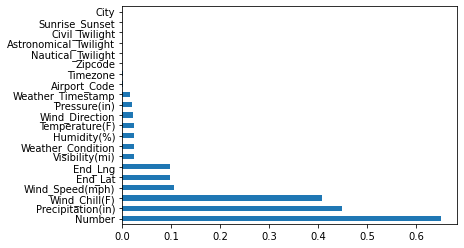

In [27]:
missing_percentages[missing_percentages !=0].plot(kind = 'barh')


Can choose to remove the columns that you dont want to use, that are absent the most 

## Exploratory Analysis & Visualisation 
Columns taken for analysis:
1. City
2. Start Time 
3. Start Lat, Start Lon
4. Temperature 
5. Weather Condition 



##City 

In [28]:
cities = df.City.unique()
cities[:100]

array(['Greenville', 'Charlotte', 'Los Gatos', 'Carson City',
       'Fort Lauderdale', 'Rifle', 'Whittier', 'Franklin', 'Valencia',
       'Dover', 'Yonkers', 'Garland', 'Tucson', 'Oakland', 'Houston',
       'Los Angeles', 'Fontana', 'Saint Clair Shores',
       'Hopewell Junction', 'Atlanta', 'Fuquay Varina', 'Daleville',
       'Martinez', 'North Charleston', 'Austin', 'Seal Beach',
       'Cedar Springs', 'Miami', 'Corfu', 'Indianapolis', 'Baton Rouge',
       'Grand Terrace', 'Providence Forge', 'Tempe', 'Pittsford',
       'Pittsburgh', 'Sacramento', 'Latham', 'Homosassa', 'Fort Worth',
       'Redding', 'Downey', 'Minneapolis', 'Lake Worth', 'Grand Rapids',
       'Aldrich', 'Richmond', 'North Highlands', 'Dublin', 'Stafford',
       'Doswell', 'Flint', 'Ballston Spa', 'Baldwin Park',
       'Monroe Township', 'Dallas', 'El Paso', 'Jacksonville',
       'Moreno Valley', 'Summerfield', 'Phoenix', 'San Diego',
       'Capitol Heights', 'East Hartford', 'Lafayette', 'Calpine',
   

In [29]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Los Angeles            68411
Houston                68265
Charlotte              56176
Miami                  49965
Dallas                 48525
                       ...  
Throop                     1
Berryton                   1
Davisboro                  1
District 1 Abingdon        1
Granite Quarry             1
Name: City, Length: 11789, dtype: int64

In [30]:
type(cities_by_accident)

pandas.core.series.Series

In [31]:
cities_by_accident[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

In [32]:
cities_by_accident[cities_by_accident == 1] ## 1306 (almost 10% cities have reported only 1 accident)

Wentworths Location    1
Lookout Mountain       1
Zionville              1
North Pownal           1
Webb                   1
                      ..
Throop                 1
Berryton               1
Davisboro              1
District 1 Abingdon    1
Granite Quarry         1
Name: City, Length: 1306, dtype: int64

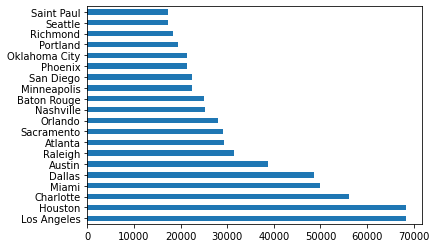

In [33]:
cities_by_accident[:20].plot(kind = 'barh')

In [34]:
import seaborn as sns
sns.set_style('darkgrid')

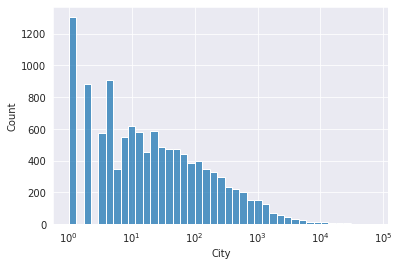

In [35]:
sns.histplot(cities_by_accident, log_scale = True)

In [36]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]
len(high_accident_cities) / len(cities)

0.04351145038167939

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


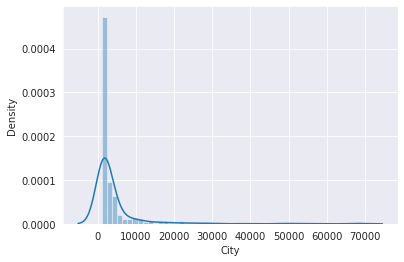

In [37]:
sns.distplot(high_accident_cities)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


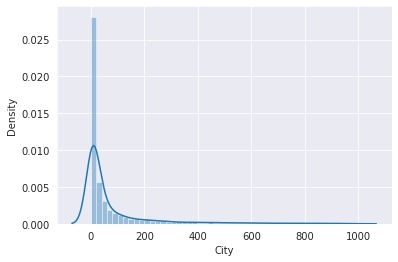

In [38]:
sns.distplot(low_accident_cities)

## Start Time 

In [39]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

In [40]:
df.Start_Time[0]

'2019-05-21 08:29:55'

In [41]:
type(df.Start_Time)

pandas.core.series.Series

In [42]:
pd.to_datetime(df.Start_Time)

0         2019-05-21 08:29:55
1         2019-10-07 17:43:09
2         2020-12-13 21:53:00
3         2018-04-17 16:51:23
4         2016-08-31 17:40:49
                  ...        
2906605   2018-06-28 08:49:01
2906606   2019-01-10 02:01:01
2906607   2020-11-23 12:52:00
2906608   2019-12-29 22:38:00
2906609   2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: datetime64[ns]

In [43]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [44]:
df.Start_Time[0]

Timestamp('2019-05-21 08:29:55')

In [45]:
df.Start_Time.dt.hour

0           8
1          17
2          21
3          16
4          17
           ..
2906605     8
2906606     2
2906607    12
2906608    22
2906609    13
Name: Start_Time, Length: 2906610, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


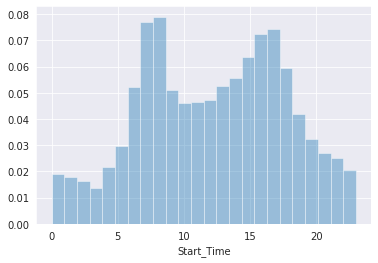

In [46]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde = False, norm_hist = True) # norm_hist converts Y axis to %age

A high percentage of accidents occur between 6-10 AM (probably people in a hurry to get to work)
2. Next highest percentage is 3 PM to 6 PM. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


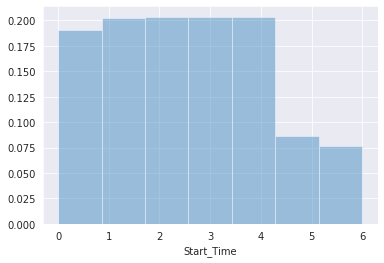

In [47]:
#day of the week plot 
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist = True)

as can be seen above, accidents are linearly much lower on weekends (saturdays & sundays) and more so equally spread out throughout the weekdays.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


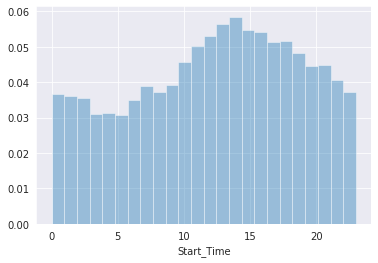

In [48]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sunday_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


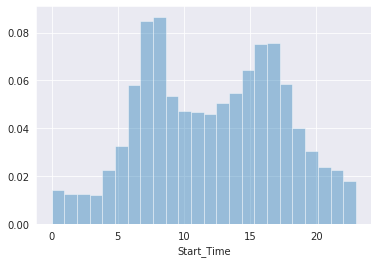

In [49]:
#check for monday now (very different compared to sundays)
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins = 24, kde = False, norm_hist=True)

On Sundays, peak appears between 10 AM - 3 PM, unlike weekdays. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


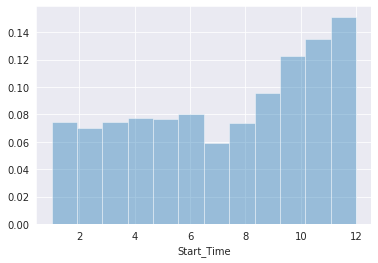

In [50]:
sns.distplot(df.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True) #accidents higher towards end of year

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


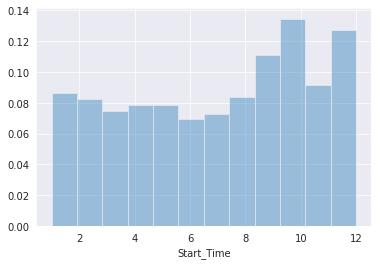

In [51]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


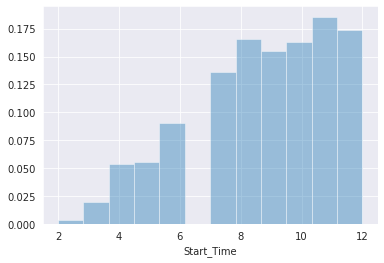

In [52]:
df_2016 = df[df.Start_Time.dt.year == 2016] # much missing month data in 2016
sns.distplot(df_2016.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)

In [56]:
df.columns #we have no column called 'Source'

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

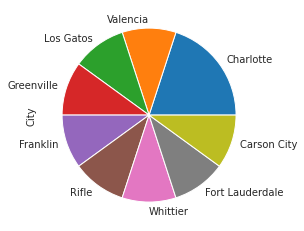

In [68]:
df.City[:10].value_counts().plot(kind = 'pie')

#Start Latitude and Start Longitude 

In [69]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [70]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

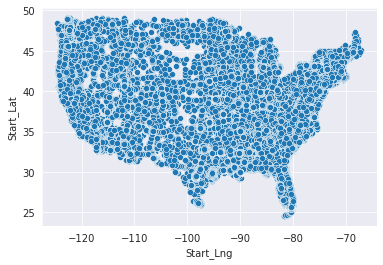

In [72]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

In [73]:
sample_df = df.sample(int(0.1*len(df)))

In [74]:
sample_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2727498,A-2727499,2,2020-10-30 02:34:00,2020-10-30 08:44:57,33.128982,-117.098776,33.128492,-117.112866,0.816,WB TO SB. [Notification] [CHP]-BT ADV ETA 8 MI...,NaN,CA-78 W,R,Escondido,San Diego,CA,92026,US,US/Pacific,KCRQ,2020-10-30 02:53:00,57.0,57.0,57.0,29.62,10.0,CALM,0.0,0.00,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2442467,A-2442468,3,2018-09-18 15:12:13,2018-09-18 15:41:57,40.798710,-74.189890,40.794960,-74.191950,0.281,At Belleville Ave/Exit 149 - Accident. Left la...,NaN,Garden State Pkwy N,R,Bloomfield,Essex,NJ,07003,US,US/Eastern,KTEB,2018-09-18 15:24:00,72.0,NaN,97.0,29.74,3.0,NNE,8.1,0.09,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1437618,A-1437619,2,2020-11-03 14:32:00,2020-11-03 15:47:30,34.084545,-118.300254,34.072997,-118.269436,1.936,Slow traffic on US-101 from Normandie Ave (US-...,NaN,CA-2 E,R,Los Angeles,Los Angeles,CA,90029,US,US/Pacific,KCQT,2020-11-03 14:52:00,75.0,75.0,55.0,29.76,5.0,CALM,0.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2660926,A-2660927,3,2019-10-10 15:22:15,2019-10-10 16:06:21,30.442150,-97.668037,NaN,NaN,0.580,Accident on exit ramp from I-35 SVC Rd Northbo...,NaN,I-35 N,R,Pflugerville,Travis,TX,78660,US,US/Central,KEDC,2019-10-10 15:15:00,93.0,93.0,38.0,29.13,10.0,S,13.0,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1577780,A-1577781,2,2020-11-01 21:44:00,2020-11-02 01:06:54,33.914483,-118.104926,33.909563,-118.105126,0.340,SB 605 TRANS TO 105. SIL LEXUS WHI CHEV COBALT...,NaN,I-605 S,R,Norwalk,Los Angeles,CA,90650,US,US/Pacific,KFUL,2020-11-01 21:53:00,65.0,65.0,56.0,29.97,10.0,ENE,3.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837139,A-1837140,2,2019-12-03 08:50:01,2019-12-03 09:35:33,41.170094,-112.020271,NaN,NaN,0.000,Right hand shoulder blocked due to accident on...,NaN,I-15 S,R,Ogden,Weber,UT,84405,US,US/Mountain,KOGD,2019-12-03 08:53:00,31.0,31.0,85.0,25.74,4.0,N,3.0,0.00,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
392646,A-392647,2,2018-10-10 08:57:13,2018-10-10 09:57:05,29.606236,-95.464783,29.606236,-95.464783,0.000,Accident on Post Oak Rd at Anderson Rd.,15176.0,S Post Oak Rd,L,Houston,Fort Bend,TX,77053-1006,US,US/Central,KAXH,2018-10-10 08:55:00,75.0,NaN,85.0,29.84,10.0,NNE,5.8,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1674992,A-1674993,3,2019-04-08 05:31:53,2019-04-08 06:01:29,40.851590,-73.952610,40.851530,-73.952330,0.015,At New Jersey/New York State Line - Accident. ...,NaN,George Washington Brg,R,Fort Lee,Bergen,NJ,07024,US,US/Eastern,KTEB,2019-04-08 05:51:00,55.0,55.0,86.0,29.90,4.0,S,6.0,0.00,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
2017109,A-2017110,2,2018-07-11 12:04:18,2018-07-11 12:33:03,30.415300,-91.086327,30.415300,-91.086327,0.000,Accident on LA-73 Jefferson Hwy Eastbound at W...,9078.0,Jefferson Hwy,R,Baton Rouge,East Baton Rouge,LA,70809-2439,US,US/Ce

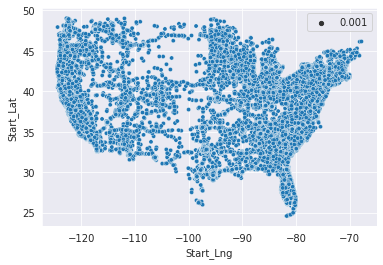

In [75]:
sns.scatterplot(x = sample_df.Start_Lng, y=sample_df.Start_Lat, size = 0.001)

In [92]:
#importing folium to plot a single location on map
import folium 
from folium.plugins import HeatMap

In [77]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(34.808868, -82.26915699999998)

In [ ]:
list(zip(list(df.Start_Lat), list(df.Start_Lng)))#gives list of pairs of lat and lon select only for sample of pairs

In [93]:
sample_df = df.sample(int(0.01*len(df)))
lat_lon_pairs = zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng))

In [94]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

Questions pertaining to the dataset 
1. Are there more accidents in warmer or colder areas?
2. Top 5 states having highest number of accidents? Per capita number? 
3. Among the top 100 cities in number of accidents, which states do they belong to most frequently?
4. What time of the day are accidents most frequent in?
5. Which days of the week have the most accidents?
6. Which months have the most accidents?
7. What is the trend of accidents year over year? Decreasing or increasing?
8. When is accidents per unit of traffic the highest?

#Summary and Conclusions
1. No data for NYC.
2. Less than 5% (4.3%) of cities have more than 1000 yearly accidents.
3. only 1306 cities have reported just one accident.
4. The number of accidents per city decreases exponentially.



[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab
